**Atualizando a biblioteca para plotagem de gráficos**


In [47]:
!pip -q install plotly --upgrade

**Importando bibliotecas**

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Abrindo um arquivo CSV do drive**

In [49]:
base = pd.read_csv('train.csv', sep=',')
print(base.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


**Você também pode carregar seu arquivo e já selecionar as colunas que desejar... investigue esta função**

In [50]:
#base2 = pd.read_csv('/content/sample_data/restaurante_correto.csv', ';', usecols=['Alternativo', 'Bar'])
#base2

In [51]:
base

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [52]:
base.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [53]:
base.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Contando quantidade de instâncias**


In [54]:
Classificação = base.columns[-1]
base[Classificação] = base[Classificação].astype(str)
np.unique(base[Classificação], return_counts=True)

(array(['C', 'Q', 'S', 'nan'], dtype=object), array([168,  77, 644,   2]))

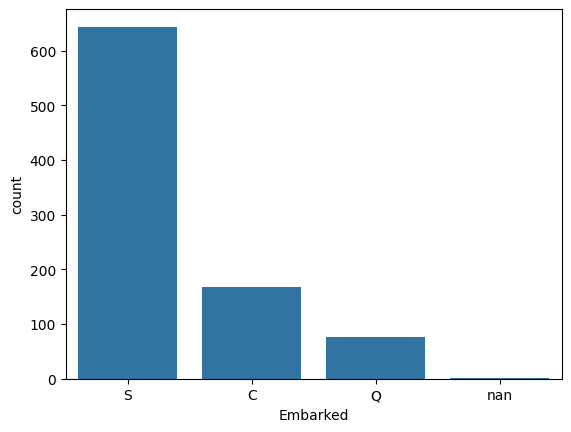

In [55]:
sns.countplot(x = base[Classificação]);

**Tratamento de dados categóricos**

> *LabelEncoder - Vamos tratar os dados categóricos colocando 1, 2, 3 e etc**



In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
#para codificar todos os atributos para laberEncoder de uma única vez
#base_encoded = base.apply(LabelEncoder().fit_transform)
cols_label_encode = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
base[cols_label_encode] = base[cols_label_encode].apply(LabelEncoder().fit_transform)

In [58]:
base

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,2,108,1,28,1,0,523,18,147,2
1,1,1,0,190,0,51,1,0,596,207,81,0
2,2,1,2,353,0,34,0,0,669,41,147,2
3,3,1,0,272,0,47,1,0,49,189,55,2
4,4,0,2,15,1,47,0,0,472,43,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,1,548,1,35,0,0,101,85,147,2
887,887,1,0,303,0,24,0,0,14,153,30,2
888,888,0,2,413,0,88,1,2,675,131,147,2
889,889,1,0,81,1,34,0,0,8,153,60,0




>** OneHotEncoder - Agora vamos binarizar atributos não ordinais**

**Contando quantas opções de resposta tem cada atributo**

In [59]:
len(np.unique(base['Pclass']))

3

In [60]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
cols_onehot_encode = ['Embarked']
# Inicializar o OneHotEncoder (sparse_output=False retorna um array denso)
onehot = OneHotEncoder(sparse_output=False)

# Aplicar o OneHotEncoder apenas nas colunas categóricas
df_onehot = onehot.fit_transform(base[cols_onehot_encode])

# Obter os novos nomes das colunas após a codificação
nomes_das_colunas = onehot.get_feature_names_out(cols_onehot_encode)

# Criar um DataFrame com os dados codificados e as novas colunas
df_onehot = pd.DataFrame(df_onehot, columns=nomes_das_colunas)

# Combinar as colunas codificadas com as colunas que não foram transformadas
base_encoded= pd.concat([df_onehot, base.drop(columns=cols_onehot_encode)], axis=1)

In [62]:
base_encoded

,Survived_0,Survived_1,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,0,2,108,1,28,1,0,523,18,147,2
1,0.0,1.0,1,0,190,0,51,1,0,596,207,81,0
2,0.0,1.0,2,2,353,0,34,0,0,669,41,147,2
3,0.0,1.0,3,0,272,0,47,1,0,49,189,55,2
4,1.0,0.0,4,2,15,1,47,0,0,472,43,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.0,0.0,886,1,548,1,35,0,0,101,85,147,2
887,0.0,1.0,887,0,303,0,24,0,0,14,153,30,2
888,1.0,0.0,888,2,413,0,88,1,2,675,131,147,2
889,0.0,1.0,889,0,81,1,34,0,0,8,153,60,0


In [63]:
base_encoded.shape

(891, 13)

**Separar o dataset em variáveis independentes (X_prev) e dependentes (y_classe)**

In [64]:
# Supondo que a última coluna seja o target
X_prev= base_encoded.iloc[:, :-1]
y_classe = base_encoded.iloc[:, -1]

**Método de amostragem Holdout**

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_prev

,Survived_0,Survived_1,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1.0,0.0,0,2,108,1,28,1,0,523,18,147
1,0.0,1.0,1,0,190,0,51,1,0,596,207,81
2,0.0,1.0,2,2,353,0,34,0,0,669,41,147
3,0.0,1.0,3,0,272,0,47,1,0,49,189,55
4,1.0,0.0,4,2,15,1,47,0,0,472,43,147
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.0,0.0,886,1,548,1,35,0,0,101,85,147
887,0.0,1.0,887,0,303,0,24,0,0,14,153,30
888,1.0,0.0,888,2,413,0,88,1,2,675,131,147
889,0.0,1.0,889,0,81,1,34,0,0,8,153,60


In [67]:
y_classe

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64

In [68]:
y_classe.shape

(891,)

In [69]:
#X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True, stratify=y)
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 42)

In [70]:
X_treino.shape

(712, 12)

In [71]:
X_teste.shape

(179, 12)

In [72]:
X_teste

,Survived_0,Survived_1,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
709,0.0,1.0,709,2,561,1,88,1,1,189,101,147
439,1.0,0.0,439,1,447,1,41,0,0,547,72,147
840,1.0,0.0,840,2,11,1,25,0,0,647,41,147
720,0.0,1.0,720,1,331,0,10,0,1,155,162,147
39,0.0,1.0,39,2,589,0,18,1,0,186,75,147
...,...,...,...,...,...,...,...,...,...,...,...,...
433,1.0,0.0,433,2,420,1,22,0,0,657,14,147
773,1.0,0.0,773,2,235,1,88,0,0,201,16,147
25,0.0,1.0,25,2,44,0,51,1,5,329,159,147
84,0.0,1.0,84,1,386,0,22,0,0,637,72,147


In [73]:
y_treino

331    2
733    2
382    2
704    2
813    2
      ..
106    2
270    2
860    2
435    2
102    2
Name: Embarked, Length: 712, dtype: int64

In [74]:
y_teste

709    0
439    2
840    2
720    2
39     0
      ..
433    2
773    0
25     2
84     2
10     2
Name: Embarked, Length: 179, dtype: int64

In [75]:
import pickle

In [76]:
with open('train.pkl', mode = 'wb') as f:
  pickle.dump([X_treino, X_teste, y_treino, y_teste], f)